In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../data/"

1. Allen Cognitive Level (ACL) Study를 진행하는 연구자들은 ACL test 점수와 정신병리학적 수준과의 관계를 알아보기 위해 아래의 변수들을 측정하였다. 

        Response y = ACL test score
        Predictor x1 = vocabulary (Vocab) score on the Shipley Institute of Living Scale
        Predictor x2 = abstraction (Abstract) score on the Shipley Institute of Living Scale
        Predictor x3 = score on the Symbol-Digit Modalities Test (SDMT)

1-a. 23명의 환자들에 대한 데이터인 `allentestn23.txt`를 사용하여 Scatterplot matrix를 그리고 회귀모형을 적합하기에 적당한지 확인하시오. 어떤 문제가 발생할 것으로 예상되는가? 

In [2]:
test23 = pd.read_table(data_path + 'allentestn23.txt', sep="\t", 
                       index_col=0)

In [3]:
test23.head()

,ACL,SDMT,Vocab,Abstract
Subj,,,,
6,4.5,23,24,24
8,5.9,50,18,14
10,4.8,27,14,8
15,4.5,26,15,10
17,5.9,42,30,32


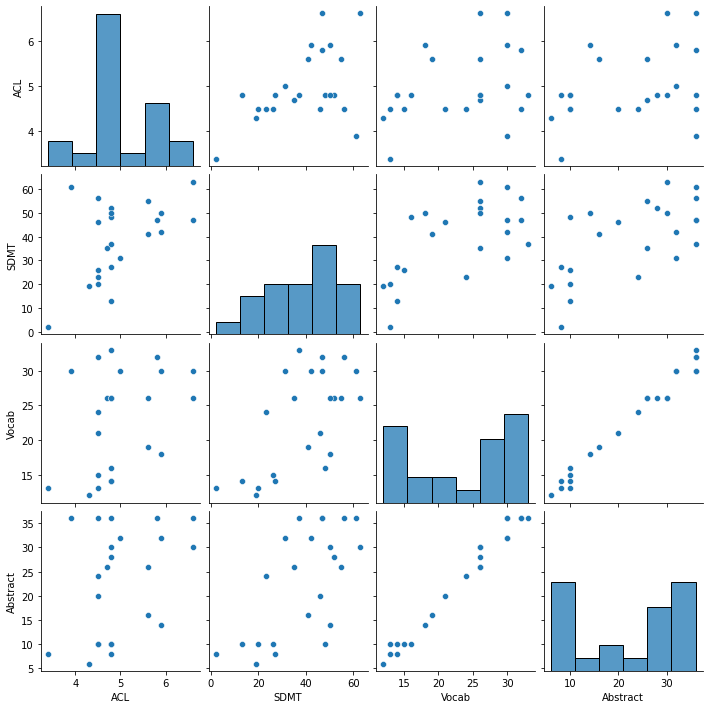

In [4]:
sns.pairplot(test23)
plt.show()

1-b. `allentestn23.txt`데이터로 회귀모형을 적합하고 다중공선성의 문제가 발생하는지 파악하시오. 어느 변수들 간의 문제가 발생하는가? 

In [5]:
model1 = smf.ols('ACL~SDMT+Vocab+Abstract', data = test23).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ACL   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2.278
Date:                Sun, 13 Feb 2022   Prob (F-statistic):              0.112
Time:                        17:47:45   Log-Likelihood:                -23.338
No. Observations:                  23   AIC:                             54.68
Df Residuals:                      19   BIC:                             59.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7471      1.342      2.791      0.012       0.937       6.557
SDMT           0.0233      0.013      1.827      0.083      -0.003       0.050
Vocab          0.0283      0.152      0.185      0.855      -0.291       0.347
Abstract      -0.0138      0.101     -0.137      0.892      -0.224       0.197
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.049
Skew:                          -0.098   Prob(JB):                        0.976
Kurtosis:                       3.111   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model1 = smf.ols('ACL~SDMT+Vocab+Abstract', data = test23).fit()
import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test23, return_type = 'matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print('VIF of', x, ':', variance_inflation_factor(X,i))

VIF of Intercept : 76.84316917575055
VIF of SDMT : 1.7261852740005994
VIF of Vocab : 49.286238682129245
VIF of Abstract : 50.60308486118107


In [7]:
test23.shape

(23, 4)

1-3. 본 연구에서는 위에서 문제가 된 두 변수를 모형에 포함시켜야 하는 과학적 이유가 존재하여 데이터를 더 모으기로 결정하였다. `allentest.txt` 데이터를 사용하여 위의 과정을 반복하고 다중공선성 문제가 해소되었는지 확인하시오. 

In [8]:
test = pd.read_table(data_path + 'allentest.txt', sep="\t")

In [9]:
test.shape

(69, 5)

In [10]:
test.head()

,Subj,ACL,Vocab,Abstract,SDMT
0,1,6.0,28,36,70
1,2,5.4,34,32,49
2,3,4.7,19,8,28
3,4,4.8,32,28,47
4,5,4.9,22,4,29


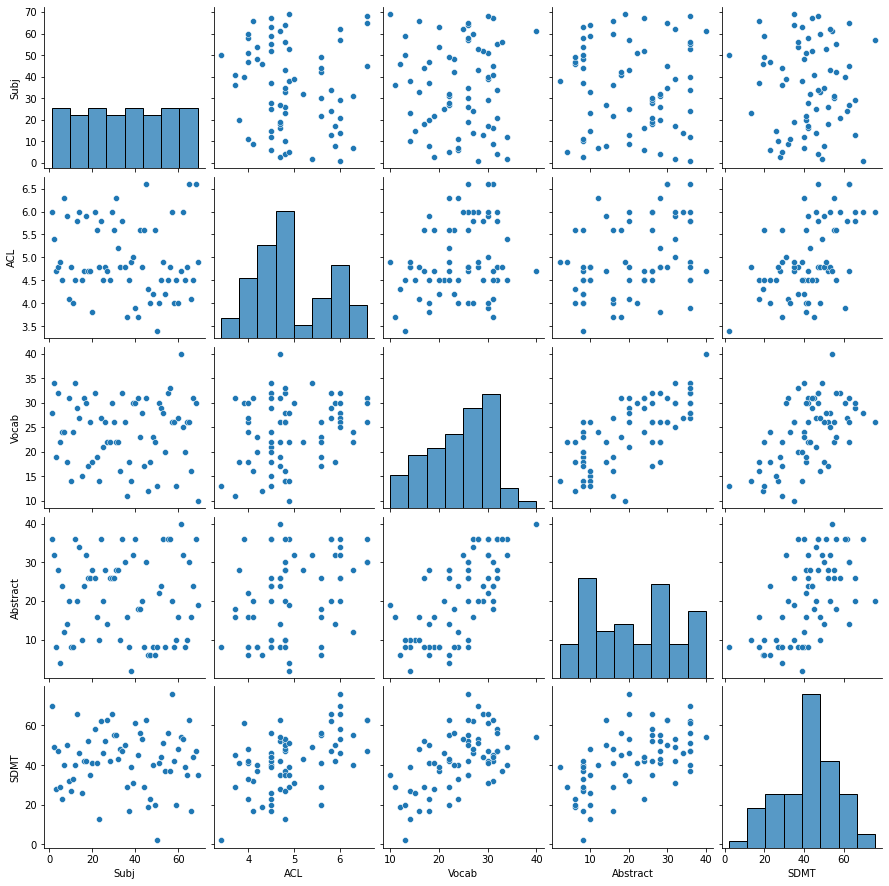

In [11]:
sns.pairplot(test)
# 데이터증가 -> Vocab~Abstract 일직선에서 조금 퍼진 형태로 변경

In [12]:
model2 = smf.ols('ACL~SDMT+Vocab+Abstract', data = test).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ACL   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8.668
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.41e-05
Time:                        17:47:50   Log-Likelihood:                -70.022
No. Observations:                  69   AIC:                             148.0
Df Residuals:                      65   BIC:                             157.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9463      0.338     11.673      0.000       3.271       4.622
SDMT           0.0274      0.007      3.823      0.000       0.013       0.042
Vocab         -0.0174      0.018     -0.962      0.339      -0.053       0.019
Abstract       0.0122      0.012      1.051      0.297      -0.011       0.035
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.458
Skew:                           0.153   Prob(JB):                        0.795
Kurtosis:                       2.744   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 데이터를 더 모은다면 p-value 값이 더 감소해서 유의해질 수도 있음.
- Vocab p-value : 0.855 -> 0.339
- Abstract p-value : 0.892 -> 0.297

In [13]:
model2 = smf.ols('ACL~SDMT+Vocab+Abstract', data = test).fit()
import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test, return_type = 'matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print('VIF of', x, ':', variance_inflation_factor(X,i))

VIF of Intercept : 16.670443334584217
VIF of SDMT : 1.609662434801304
VIF of Vocab : 2.0932972330713198
VIF of Abstract : 2.1674284112401403
